In [1]:
# import libraries
import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

import numpy as np
import sys

sys.path.append('../')
import datasets.clickbait_dataset as ds

Using TensorFlow backend.


In [2]:
max_words = 500
batch_size = 256
epochs = 10

In [3]:
# load dataset
train_x, train_y, test_x, test_y = ds.load_data()

In [4]:
# prepare data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_x)
train_x = tokenizer.texts_to_matrix(train_x)
test_x = tokenizer.texts_to_matrix(test_x)
train_y = keras.utils.to_categorical(train_y, 2)
test_y = keras.utils.to_categorical(test_y, 2)

In [5]:
# build model
model = Sequential()

model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
# train model
model_log = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 16125 samples, validate on 1792 samples
Epoch 1/10
16125/16125 [==============================] - 2s 112us/step - loss: 0.4349 - acc: 0.8138 - val_loss: 0.2958 - val_acc: 0.8839
Epoch 2/10
16125/16125 [==============================] - 0s 14us/step - loss: 0.2635 - acc: 0.8909 - val_loss: 0.2673 - val_acc: 0.8884
Epoch 3/10
16125/16125 [==============================] - 0s 14us/step - loss: 0.2334 - acc: 0.9038 - val_loss: 0.2605 - val_acc: 0.8956
Epoch 4/10
16125/16125 [==============================] - 0s 14us/step - loss: 0.2157 - acc: 0.9122 - val_loss: 0.2565 - val_acc: 0.8973
Epoch 5/10
16125/16125 [==============================] - 0s 14us/step - loss: 0.2025 - acc: 0.9173 - val_loss: 0.2529 - val_acc: 0.8962
Epoch 6/10
16125/16125 [==============================] - 0s 14us/step - loss: 0.1903 - acc: 0.9245 - val_loss: 0.2550 - val_acc: 0.8979
Epoch 7/10
16125/16125 [==============================] - 0s 14us/step - loss: 0.1794 - acc: 0.9287 - val_loss: 0.2528 - val_acc

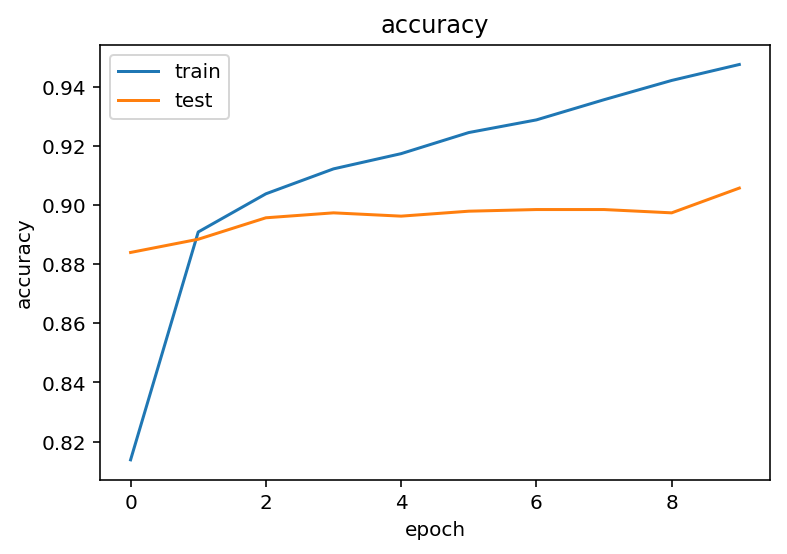

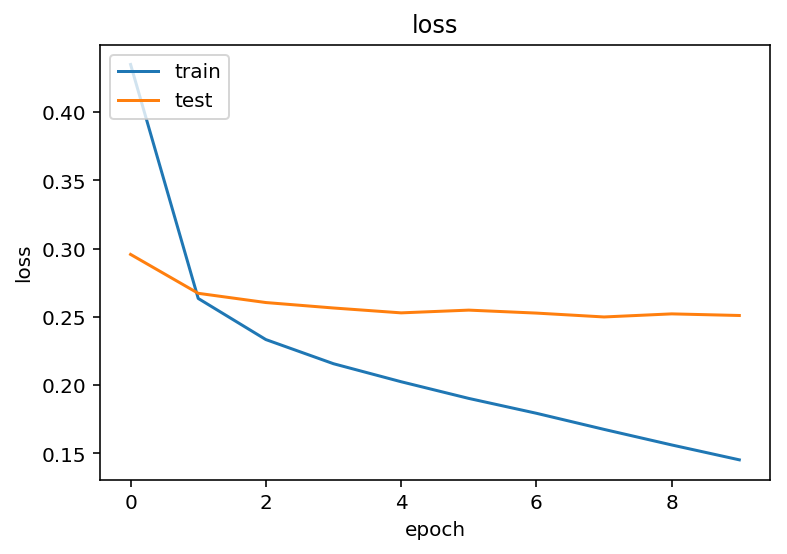

In [7]:
# show graph of loss and accuracy
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

             precision    recall  f1-score   support

   positive       0.90      0.92      0.91       920
   negative       0.91      0.89      0.90       872

avg / total       0.91      0.91      0.91      1792



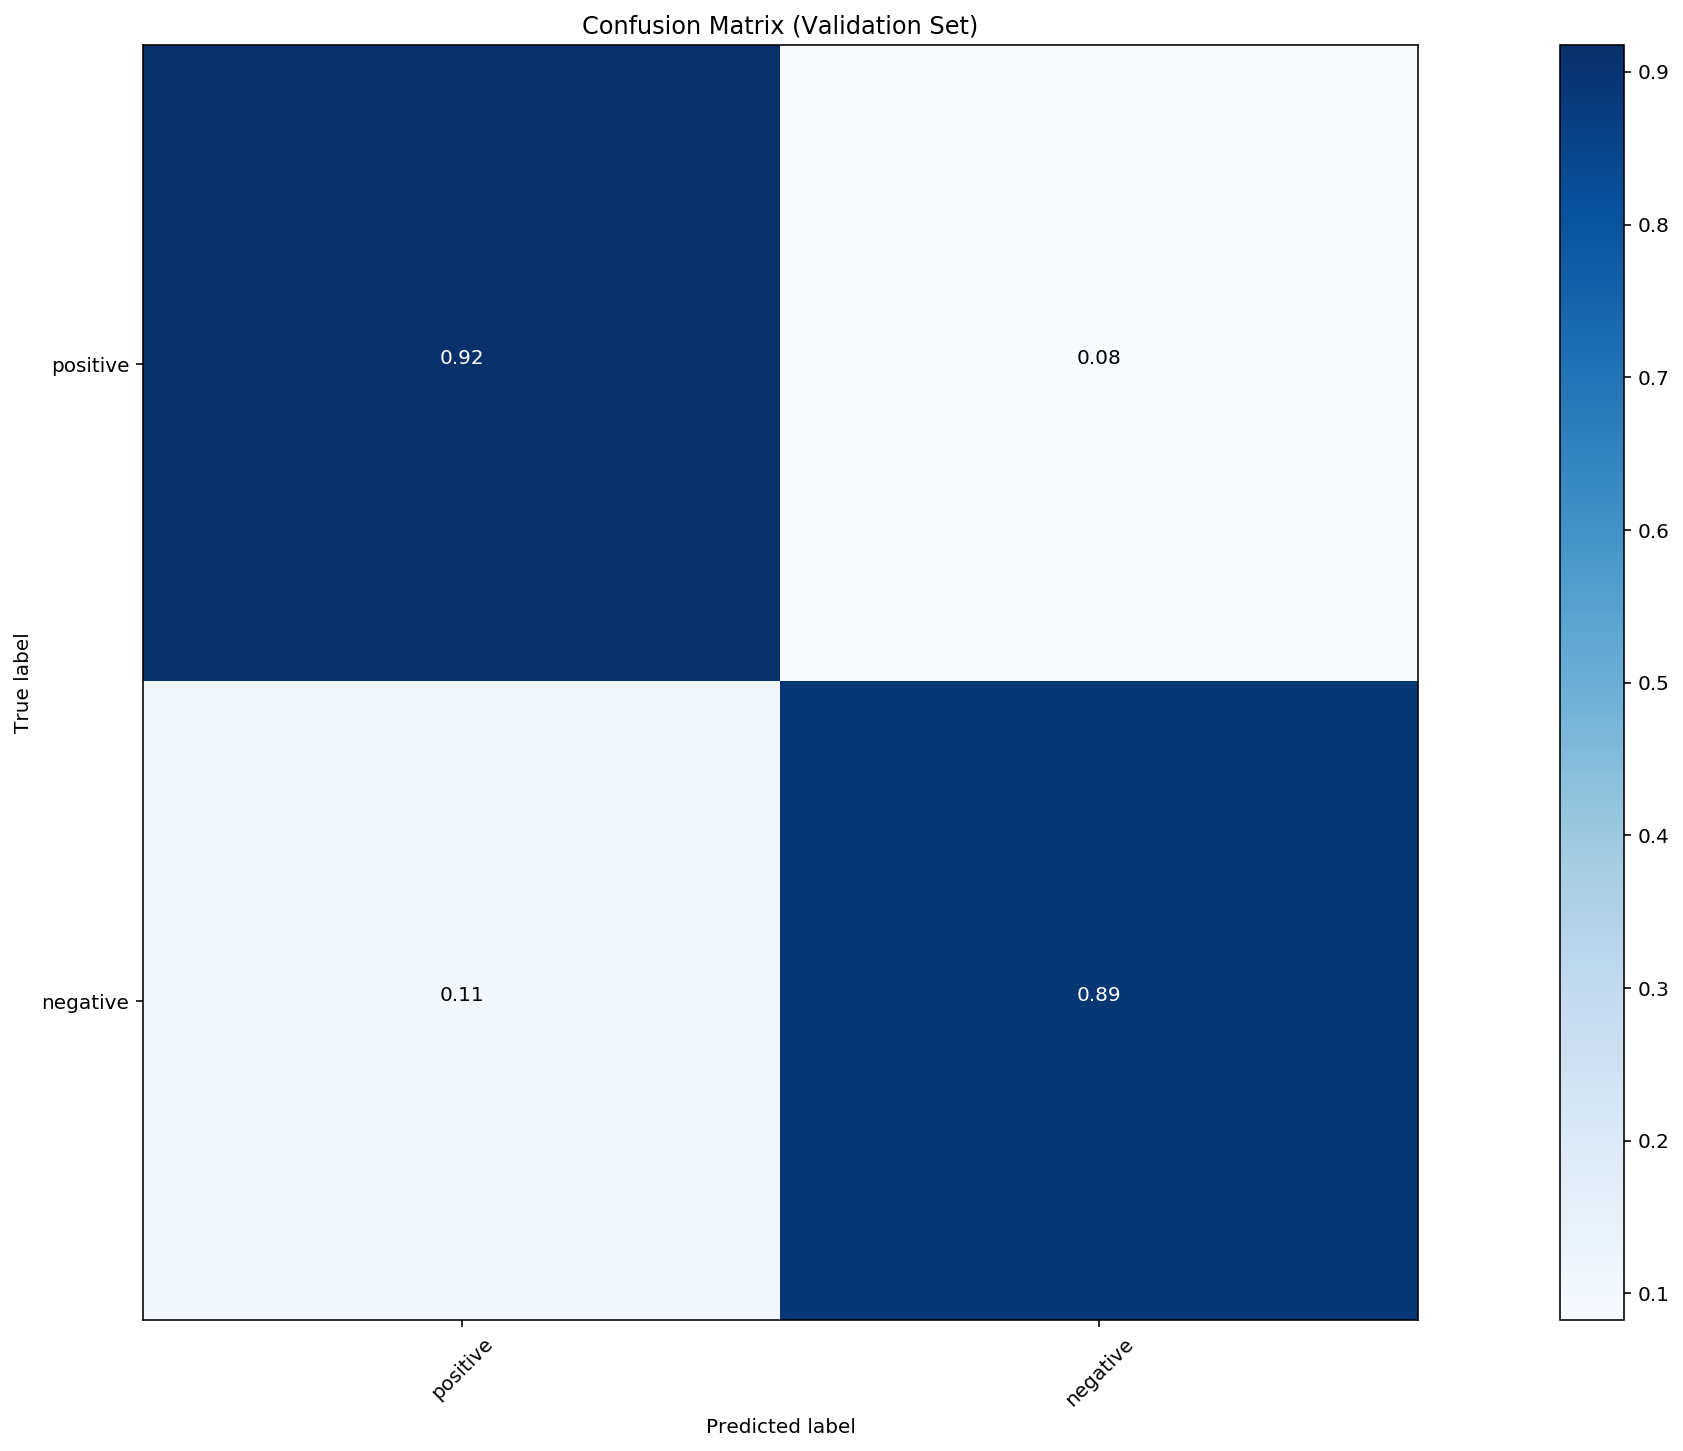

In [8]:
# draw confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools, pickle

classes = ["positive", "negative"]

Y_test = np.argmax(test_y, axis=1) # Convert one-hot to index
y_pred = model.predict(test_x)
y_pred_class = np.argmax(y_pred,axis=1)
cnf_matrix = confusion_matrix(Y_test, y_pred_class)
print(classification_report(Y_test, y_pred_class, target_names=classes))

def plot_confusion_matrix(cm, labels,
                          normalize=True,
                          title='Confusion Matrix (Validation Set)',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        #print('Confusion matrix, without normalization')
        pass

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure(figsize=(20,10))
plot_confusion_matrix(cnf_matrix, labels=classes)

In [25]:
# manual test
test_title = ""
test_x = [test_title]
test_x = tokenizer.texts_to_matrix(test_x)
pred = model.predict(test_x)
print('It ' + ('looks' if pred[0][0] < 0.5 else "does't look") + ' like clickbait\n')

It does't look like clickbait

